In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
rack1_1 = pd.read_csv('./dscpdata/MacPherson_1_15_4_24.csv')

In [3]:
rack1_1.head()

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Grams of Compost Harvested
0,Unit,Number,ppm,ppm,ppm,ppm,ppm,ppm,lux,DEG C,%,NIL,NIL,NIL,NIL,mV,g
1,"15 Feb 2024, 10:00 AM",30,54,56,142,142,132,122,29,32.7,80,95,1,1,121.85,-126.85,NaN
2,"15 Feb 2024, 10:10 AM",30,54,56,142,142,110,120,29,32.7,81,95,1,1,117.67,-124.67,NaN
3,"15 Feb 2024, 10:20 AM",30,54,56,140,140,132,123,29,32.7,81,93,1,1,117.29,-118.29,NaN
4,"15 Feb 2024, 10:30 AM",30,54,56,140,140,129,123,29,32.7,80,90,1,1,115.58,-116.58,NaN


In [4]:
rack1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      56 non-null     object
 1   Number of Worms (non-counted)  56 non-null     object
 2   Phosphorous01                  56 non-null     object
 3   Phosphorous02                  56 non-null     object
 4   Nitrogen01                     56 non-null     object
 5   Nitrogen02                     56 non-null     object
 6   Potassium01                    56 non-null     object
 7   Potassium02                    56 non-null     object
 8   Light Intensity                56 non-null     object
 9   Temp01                         56 non-null     object
 10  Hum01                          56 non-null     object
 11  Heat01                         56 non-null     object
 12  SoilM01                        56 non-null     object
 13  SoilM02

In [5]:
rack1_1.describe()

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,Hum01,Heat01,SoilM01,SoilM02,pH Rod 1,pH Rod 2,Grams of Compost Harvested
count,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,2
unique,56,2,5,5,7,5,10,9,15,14,13,10,2,2,55,55,2
top,Unit,30,56,59,83,51,72,72,29,28.5,79,95,1,1,185.81,-198.74,g
freq,1,55,30,35,21,43,35,27,12,26,7,25,55,55,2,2,1


### Looking at Missing Data for Each Variable

In [6]:
rack1_1.isnull().sum()

Timestamp                         0
Number of Worms (non-counted)     0
Phosphorous01                     0
Phosphorous02                     0
Nitrogen01                        0
Nitrogen02                        0
Potassium01                       0
Potassium02                       0
Light Intensity                   0
Temp01                            0
Hum01                             0
Heat01                            0
SoilM01                           0
SoilM02                           0
pH Rod 1                          0
pH Rod 2                          0
Grams of Compost Harvested       54
dtype: int64

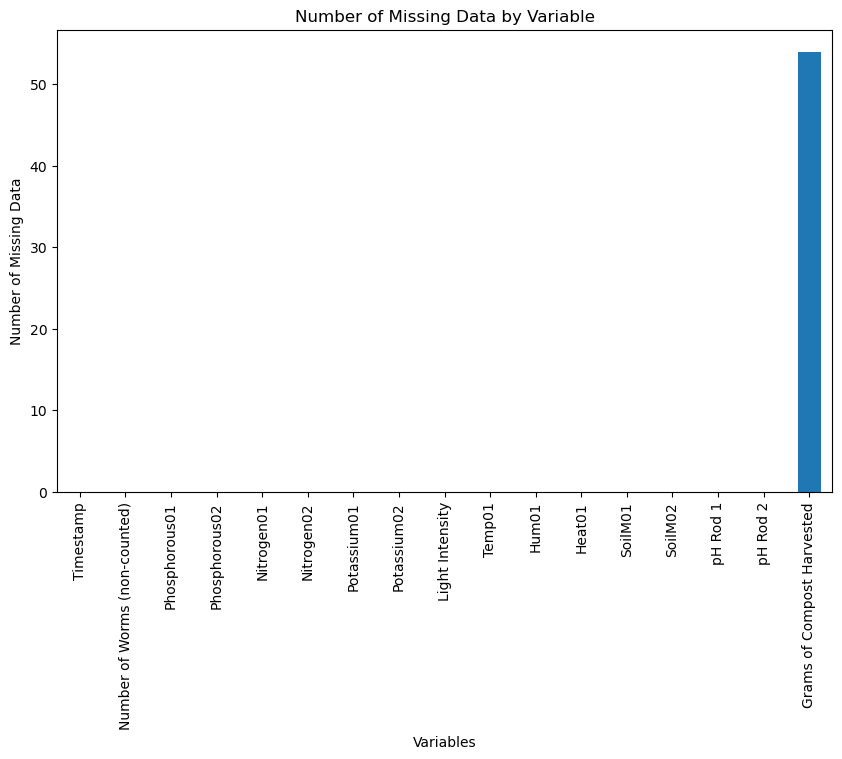

In [7]:
#Visualising missing data
color = []
missing_counts = rack1_1.isnull().sum()

plt.figure(figsize=(10, 6))  # Set the figure size

missing_counts.plot(kind='bar')


plt.title('Number of Missing Data by Variable')  # Set the title
plt.xlabel('Variables')  # Set the x-axis label
plt.ylabel('Number of Missing Data')  # Set the y-axis label

plt.show()

### Fixing Wrong Data Types

In [8]:
for column in ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 'Potassium01', 'Potassium02']:
    rack1_1[column] = pd.to_numeric(rack1_1[column], errors='coerce') 
    rack1_1[column] = rack1_1[column].fillna(0)  
    rack1_1[column] = rack1_1[column].astype(int)  

rack1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      56 non-null     object
 1   Number of Worms (non-counted)  56 non-null     object
 2   Phosphorous01                  56 non-null     int32 
 3   Phosphorous02                  56 non-null     int32 
 4   Nitrogen01                     56 non-null     int32 
 5   Nitrogen02                     56 non-null     int32 
 6   Potassium01                    56 non-null     int32 
 7   Potassium02                    56 non-null     int32 
 8   Light Intensity                56 non-null     object
 9   Temp01                         56 non-null     object
 10  Hum01                          56 non-null     object
 11  Heat01                         56 non-null     object
 12  SoilM01                        56 non-null     object
 13  SoilM02

In [9]:
rack1_1['Timestamp'] = pd.to_datetime(rack1_1['Timestamp'], errors='coerce')



C:\Users\huohe\AppData\Local\Temp\ipykernel_9328\2111647249.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rack1_1['Timestamp'] = pd.to_datetime(rack1_1['Timestamp'], errors='coerce')


### Trend over time

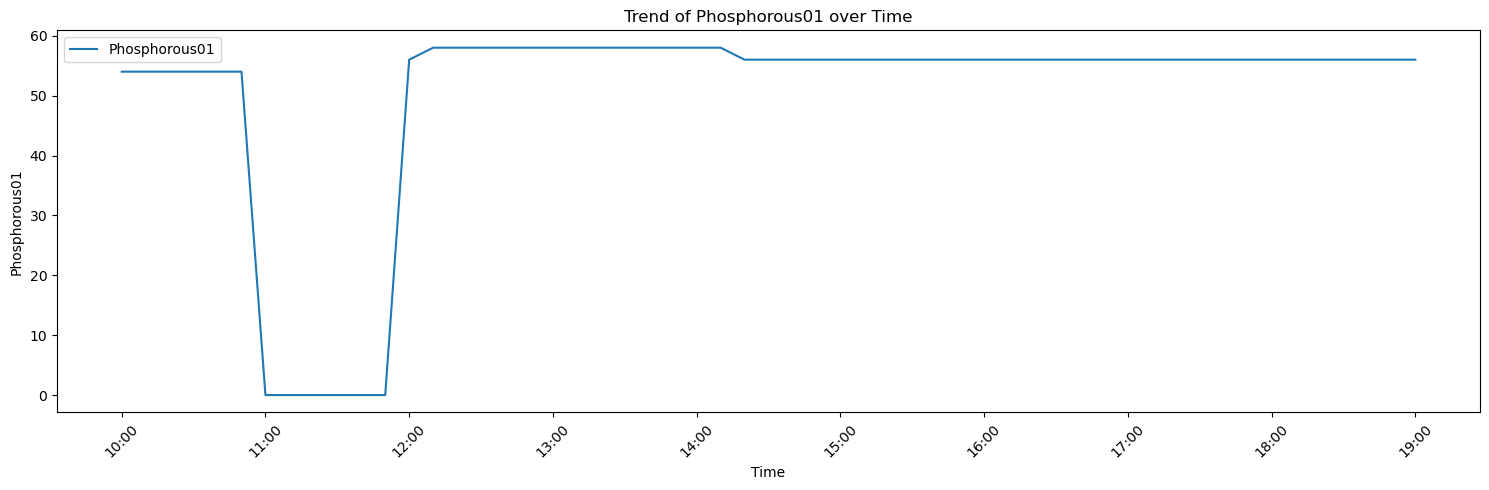

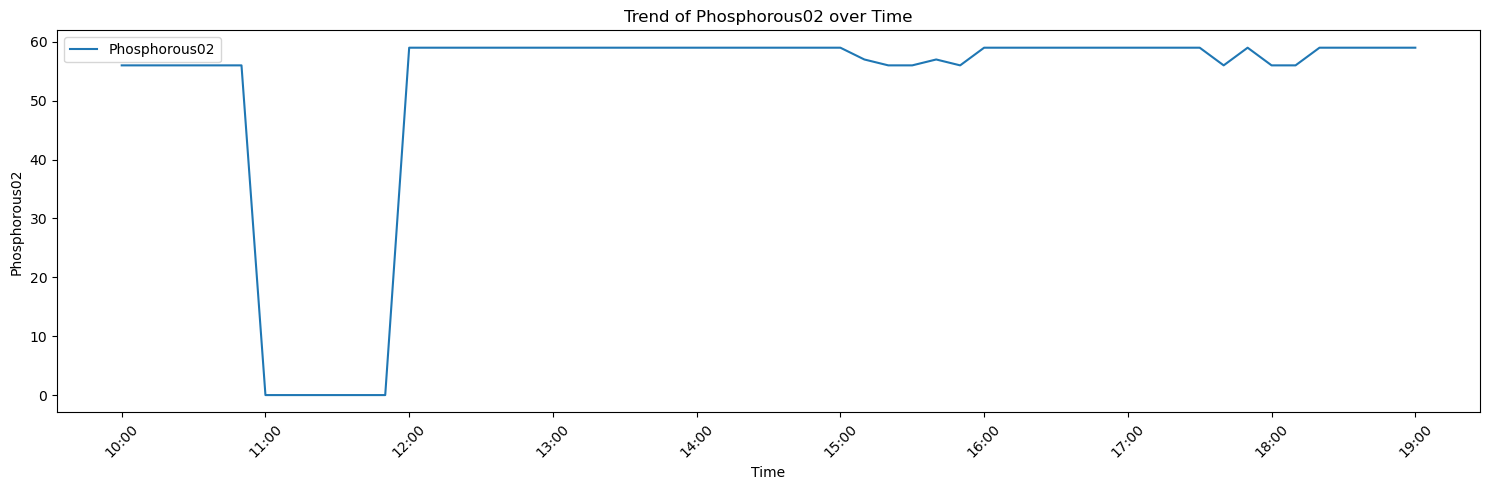

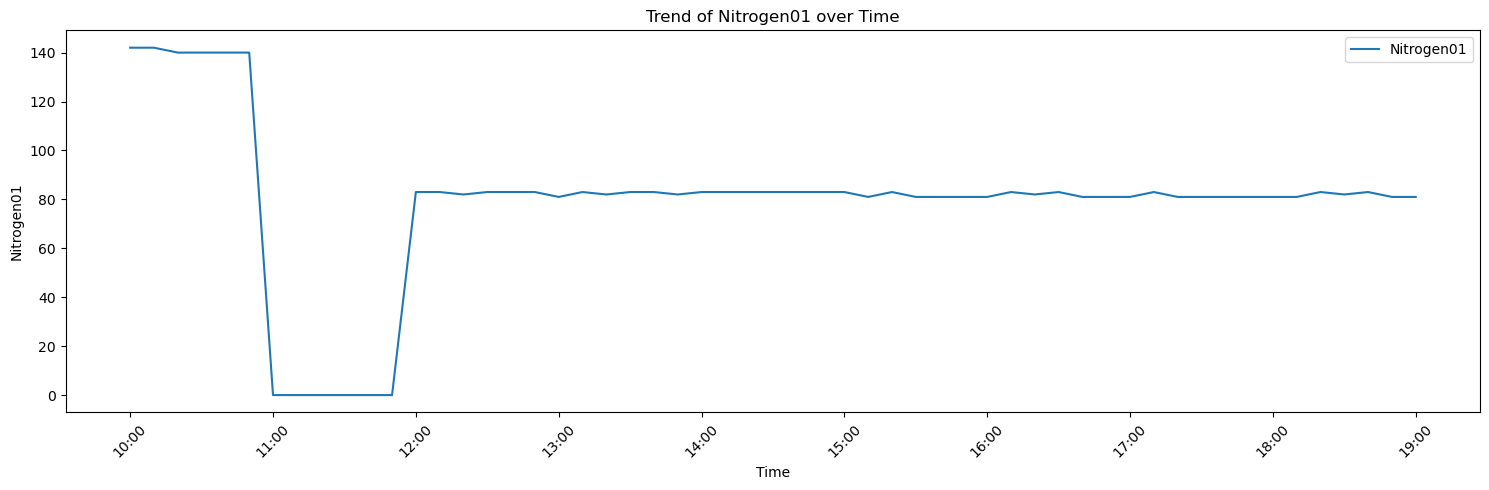

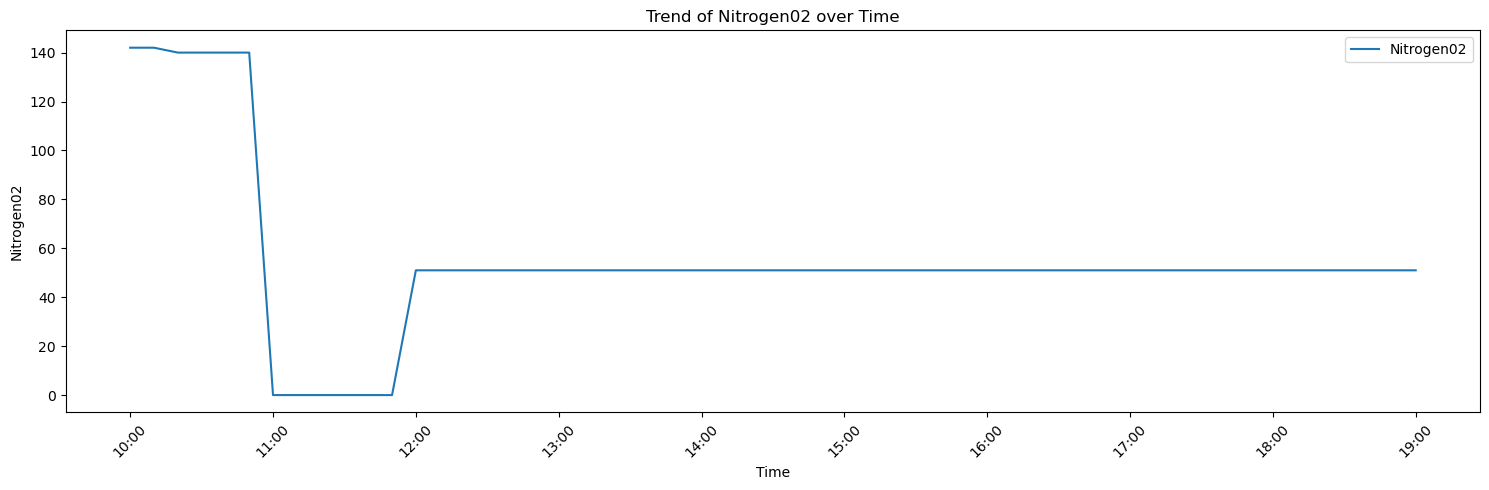

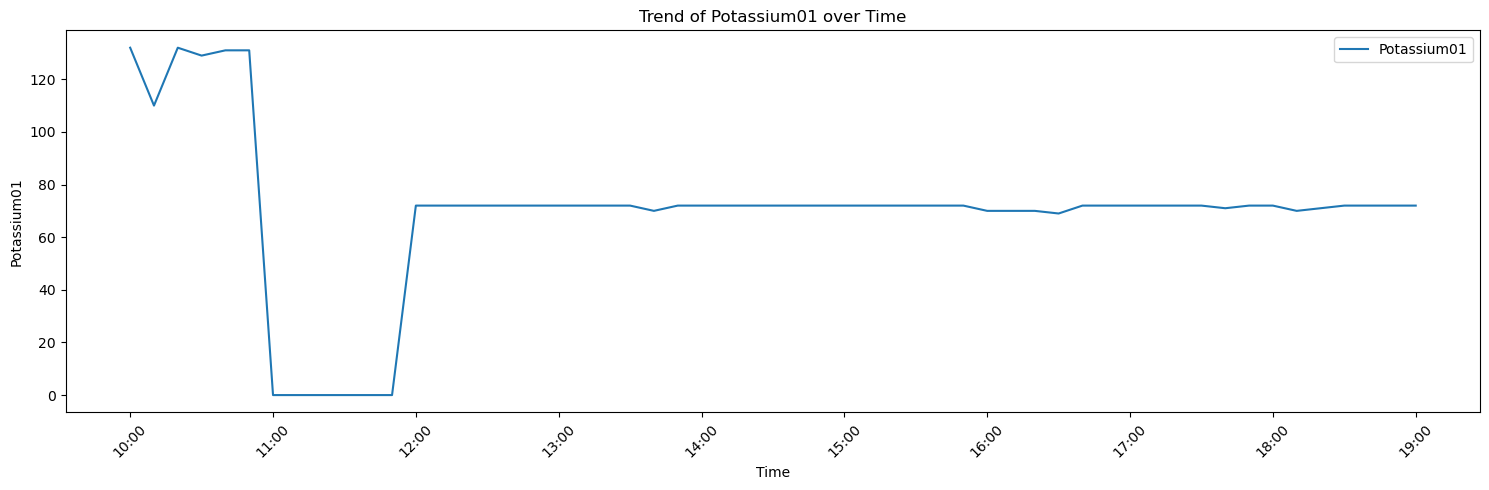

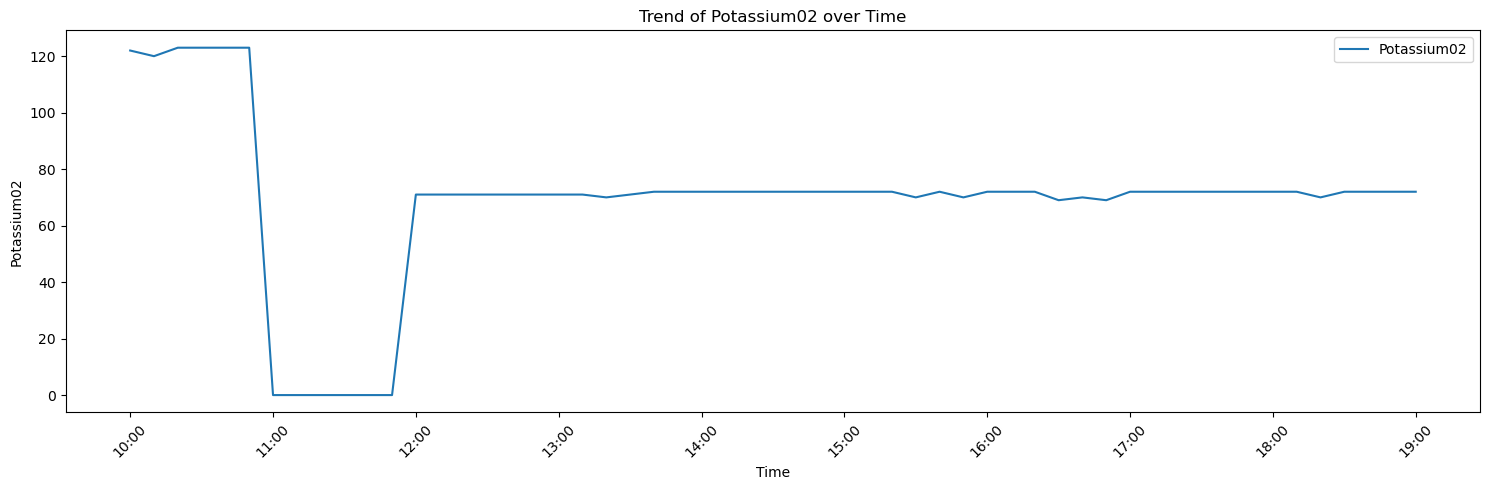

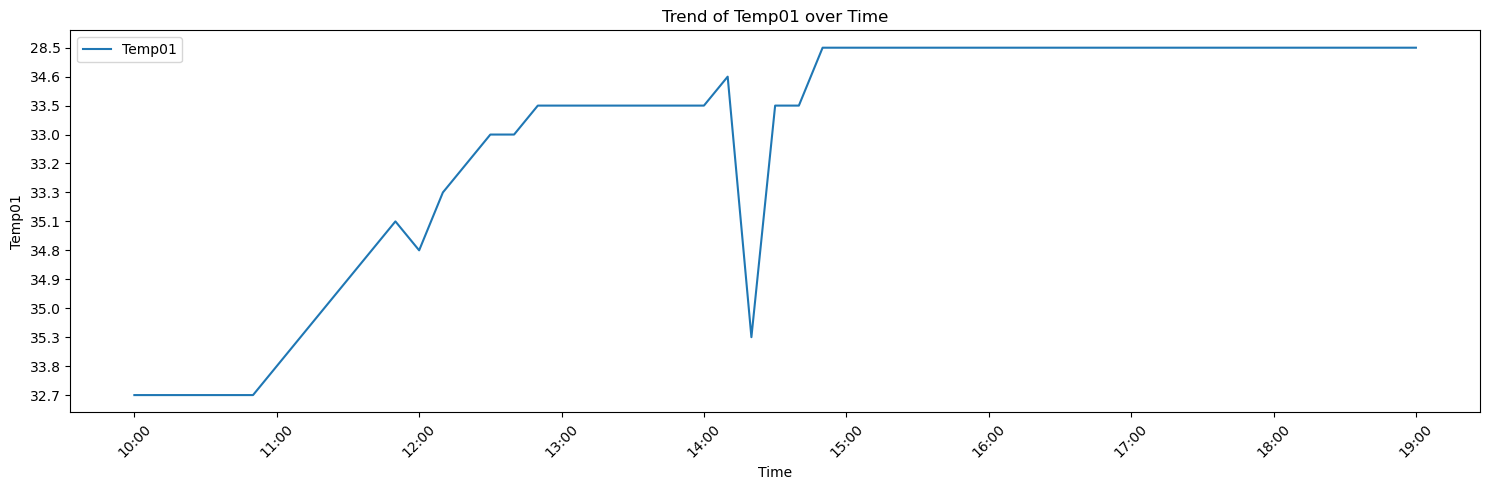

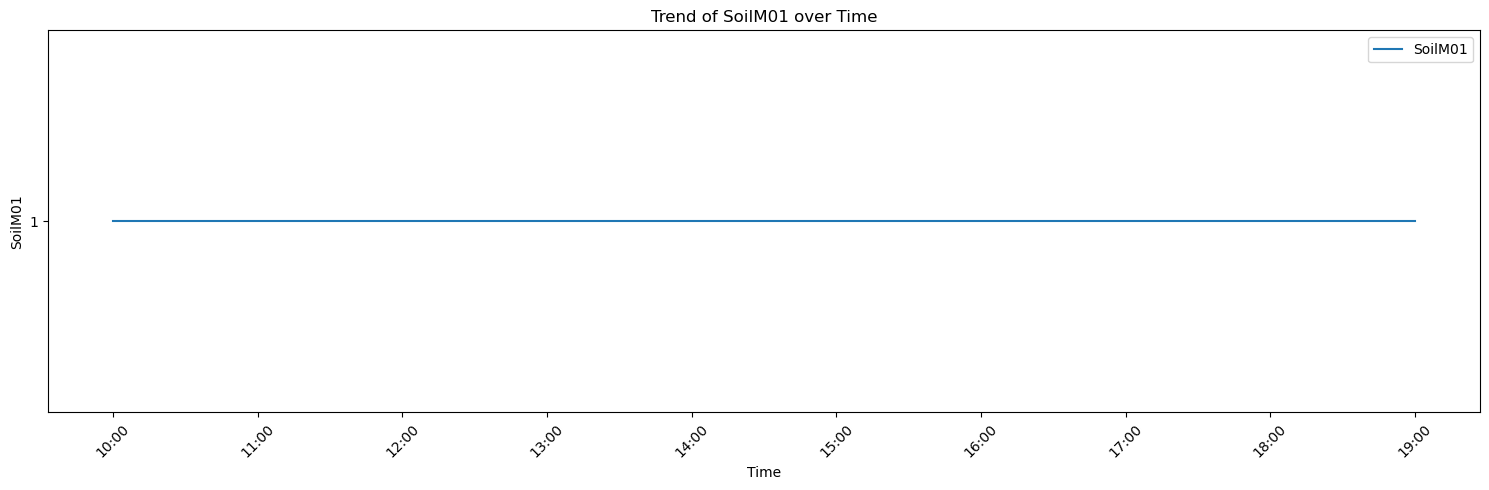

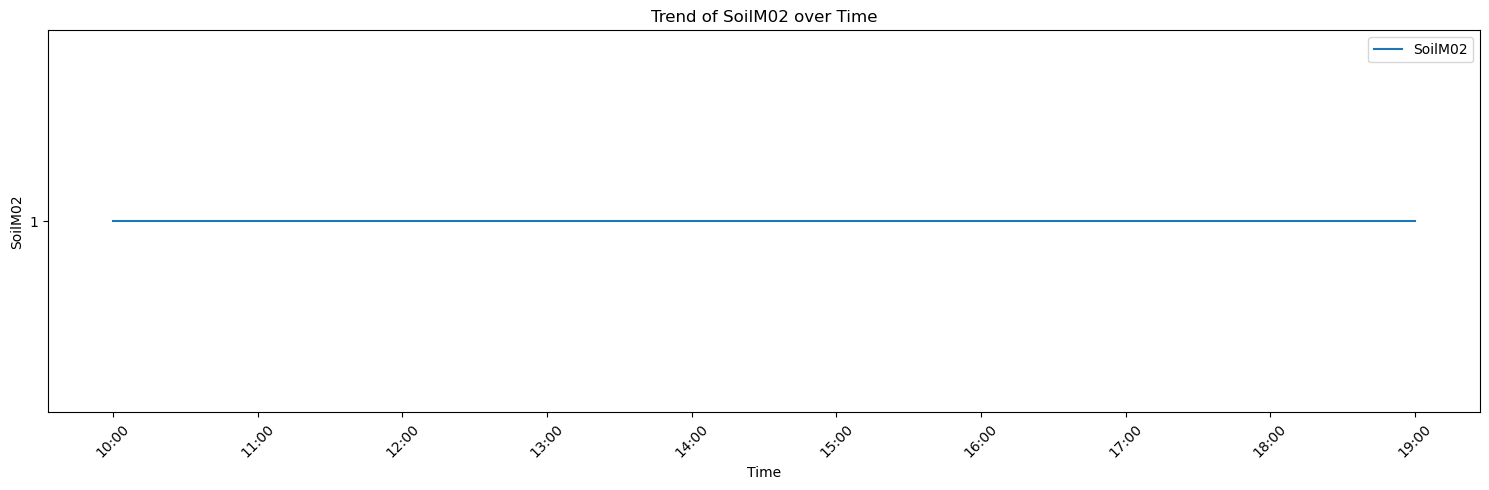

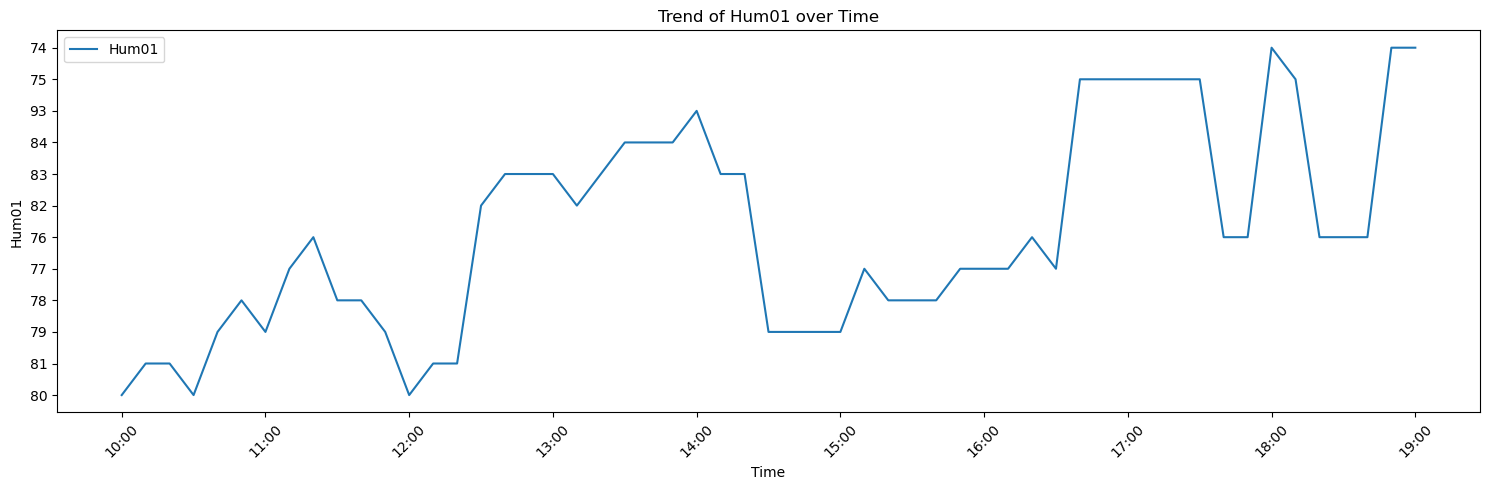

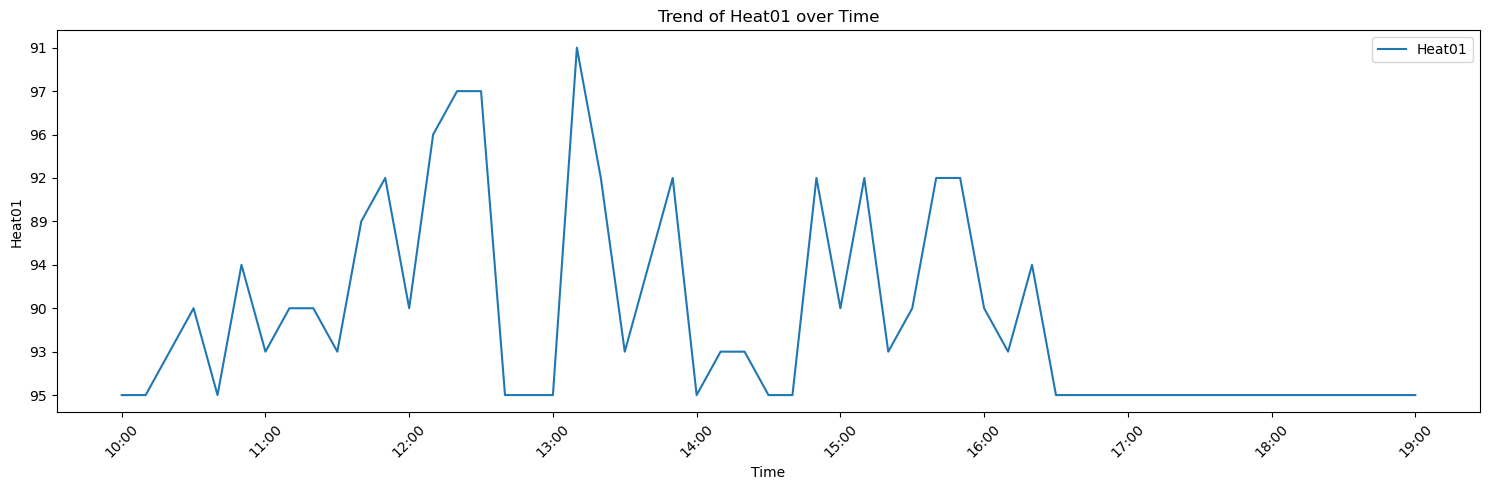

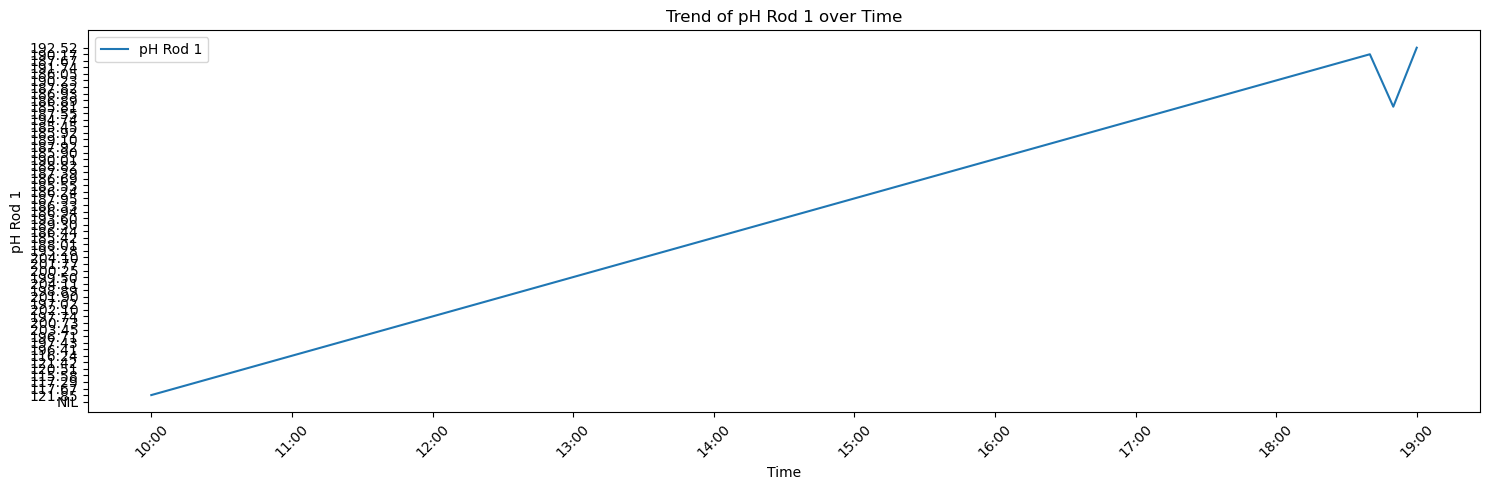

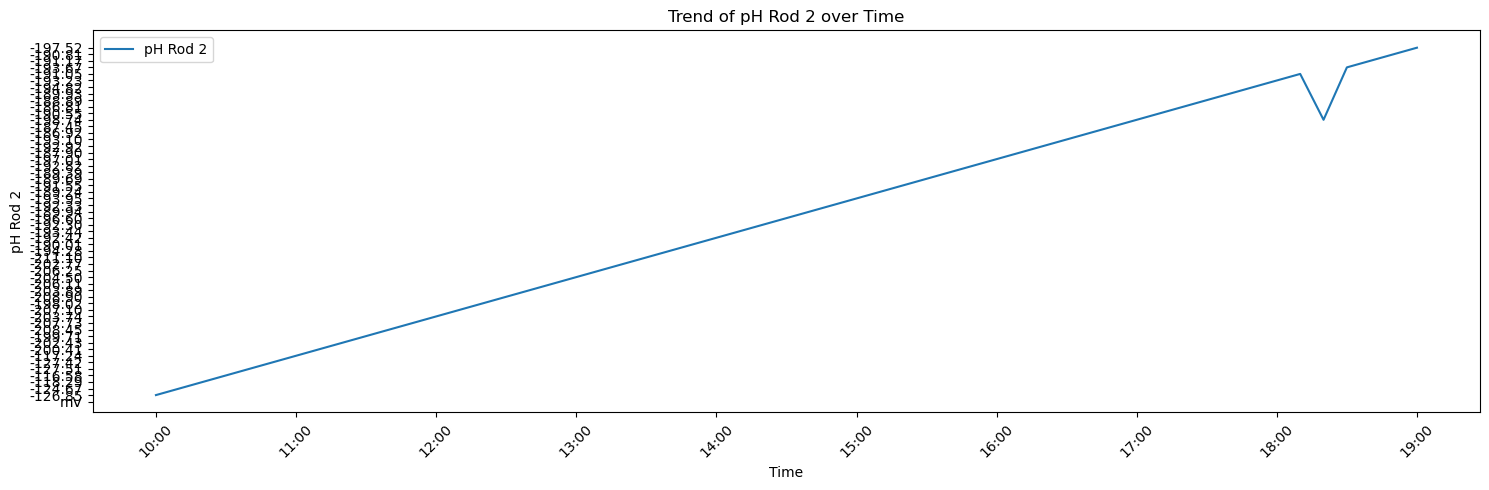

In [10]:

import matplotlib.dates as mdates

# Assuming 'Timestamp' is already converted to a datetime format in rack1_1 DataFrame

# Now, plot each variable over time
variables_to_plot = ['Phosphorous01', 'Phosphorous02', 'Nitrogen01', 'Nitrogen02', 
                     'Potassium01', 'Potassium02', 'Temp01', 'SoilM01', 'SoilM02',
                     'Hum01', 'Heat01','pH Rod 1','pH Rod 2']

for variable in variables_to_plot:
    plt.figure(figsize=(15, 5))
    plt.plot(rack1_1['Timestamp'], rack1_1[variable], label=variable)
    plt.title(f'Trend of {variable} over Time')
    plt.xlabel('Time')
    plt.ylabel(variable)

    # Configure x-axis with time formatting
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes

    plt.xticks(rotation=45)  # Rotate for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()


### NPK RATIO

In [11]:
# Convert the necessary columns to numeric, coercing errors for any non-numeric data
rack1_1['Phosphorous01'] = pd.to_numeric(rack1_1['Phosphorous01'], errors='coerce')
rack1_1['Nitrogen01'] = pd.to_numeric(rack1_1['Nitrogen01'], errors='coerce')
rack1_1['Potassium01'] = pd.to_numeric(rack1_1['Potassium01'], errors='coerce')

# Now, calculate the NPK ratio
# This will create a string like "N:P:K" for each entry
rack1_1['NPK_Ratio'] = rack1_1['Nitrogen01'].astype(str) + ':' + \
                       rack1_1['Phosphorous01'].astype(str) + ':' + \
                       rack1_1['Potassium01'].astype(str)

# If you need the NPK ratio as actual numerical ratio (which sums to 1), you can use:
# rack1_1['NPK_Ratio'] = rack1_1.apply(lambda x: x['Nitrogen01'] / (x['Nitrogen01'] + x['Phosphorous01'] + x['Potassium01']), axis=1)

# Check the new variable
rack1_1['NPK_Ratio'].head()

0         0:0:0
1    142:54:132
2    142:54:110
3    140:54:132
4    140:54:129
Name: NPK_Ratio, dtype: object

In [12]:
# Convert the 'Phosphorous', 'Nitrogen', and 'Potassium' columns to numeric, coercing errors to NaN
rack1_1['Phosphorous01'] = pd.to_numeric(rack1_1['Phosphorous01'], errors='coerce')
rack1_1['Phosphorous02'] = pd.to_numeric(rack1_1['Phosphorous02'], errors='coerce')
rack1_1['Nitrogen01'] = pd.to_numeric(rack1_1['Nitrogen01'], errors='coerce')
rack1_1['Nitrogen02'] = pd.to_numeric(rack1_1['Nitrogen02'], errors='coerce')
rack1_1['Potassium01'] = pd.to_numeric(rack1_1['Potassium01'], errors='coerce')
rack1_1['Potassium02'] = pd.to_numeric(rack1_1['Potassium02'], errors='coerce')

# Calculate the sum of the averaged readings for N, P, and K
rack1_1['Sum_NPK_Avg'] = ((rack1_1['Nitrogen01'] + rack1_1['Nitrogen02']) / 2) + \
                         ((rack1_1['Phosphorous01'] + rack1_1['Phosphorous02']) / 2) + \
                         ((rack1_1['Potassium01'] + rack1_1['Potassium02']) / 2)

# Calculate the percentage of N, P, and K relative to the sum of the averaged readings
rack1_1['N_Percentage'] = ((rack1_1['Nitrogen01'] + rack1_1['Nitrogen02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100
rack1_1['P_Percentage'] = ((rack1_1['Phosphorous01'] + rack1_1['Phosphorous02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100
rack1_1['K_Percentage'] = ((rack1_1['Potassium01'] + rack1_1['Potassium02']) / 2) / rack1_1['Sum_NPK_Avg'] * 100

# Check the new variables by displaying the first few rows
print(rack1_1[['N_Percentage', 'P_Percentage', 'K_Percentage']].head())


   N_Percentage  P_Percentage  K_Percentage
0           NaN           NaN           NaN
1     43.827160     16.975309     39.197531
2     45.512821     17.628205     36.858974
3     43.410853     17.054264     39.534884
4     43.613707     17.133956     39.252336


In [13]:
# Calculate the mean for N, P, and K percentages
average_N_percentage = rack1_1['N_Percentage'].mean()
average_P_percentage = rack1_1['P_Percentage'].mean()
average_K_percentage = rack1_1['K_Percentage'].mean()

# Output the averages
average_N_percentage, average_P_percentage, average_K_percentage

(35.22579694945469, 27.914532996751248, 36.85967005379406)

In [14]:
rack1_1['derivative'] = np.sqrt((rack1_1['N_Percentage'] - 33.33)**2 + 
                                (rack1_1['P_Percentage'] - 33.33)**2 + 
                                (rack1_1['K_Percentage'] - 33.33)**2)

In [15]:
rack1_1.head()

,Timestamp,Number of Worms (non-counted),Phosphorous01,Phosphorous02,Nitrogen01,Nitrogen02,Potassium01,Potassium02,Light Intensity,Temp01,...,SoilM02,pH Rod 1,pH Rod 2,Grams of Compost Harvested,NPK_Ratio,Sum_NPK_Avg,N_Percentage,P_Percentage,K_Percentage,derivative
0,NaT,Number,0,0,0,0,0,0,lux,DEG C,...,NIL,NIL,mV,g,0:0:0,0.0,NaN,NaN,NaN,NaN
1,2024-02-15 10:00:00,30,54,56,142,142,132,122,29,32.7,...,1,121.85,-126.85,NaN,142:54:132,324.0,43.827160,16.975309,39.197531,20.300104
2,2024-02-15 10:10:00,30,54,56,142,142,110,120,29,32.7,...,1,117.67,-124.67,NaN,142:54:110,312.0,45.512821,17.628205,36.858974,20.184676
3,2024-02-15 10:20:00,30,54,56,140,140,132,123,29,32.7,...,1,117.29,-118.29,NaN,140:54:132,322.5,43.410853,17.054264,39.534884,20.125202
4,2024-02-15 10:30:00,30,54,56,140,140,129,123,29,32.7,...,1,115.58,-116.58,NaN,140:54:129,321.0,43.613707,17.133956,39.252336,20.078360


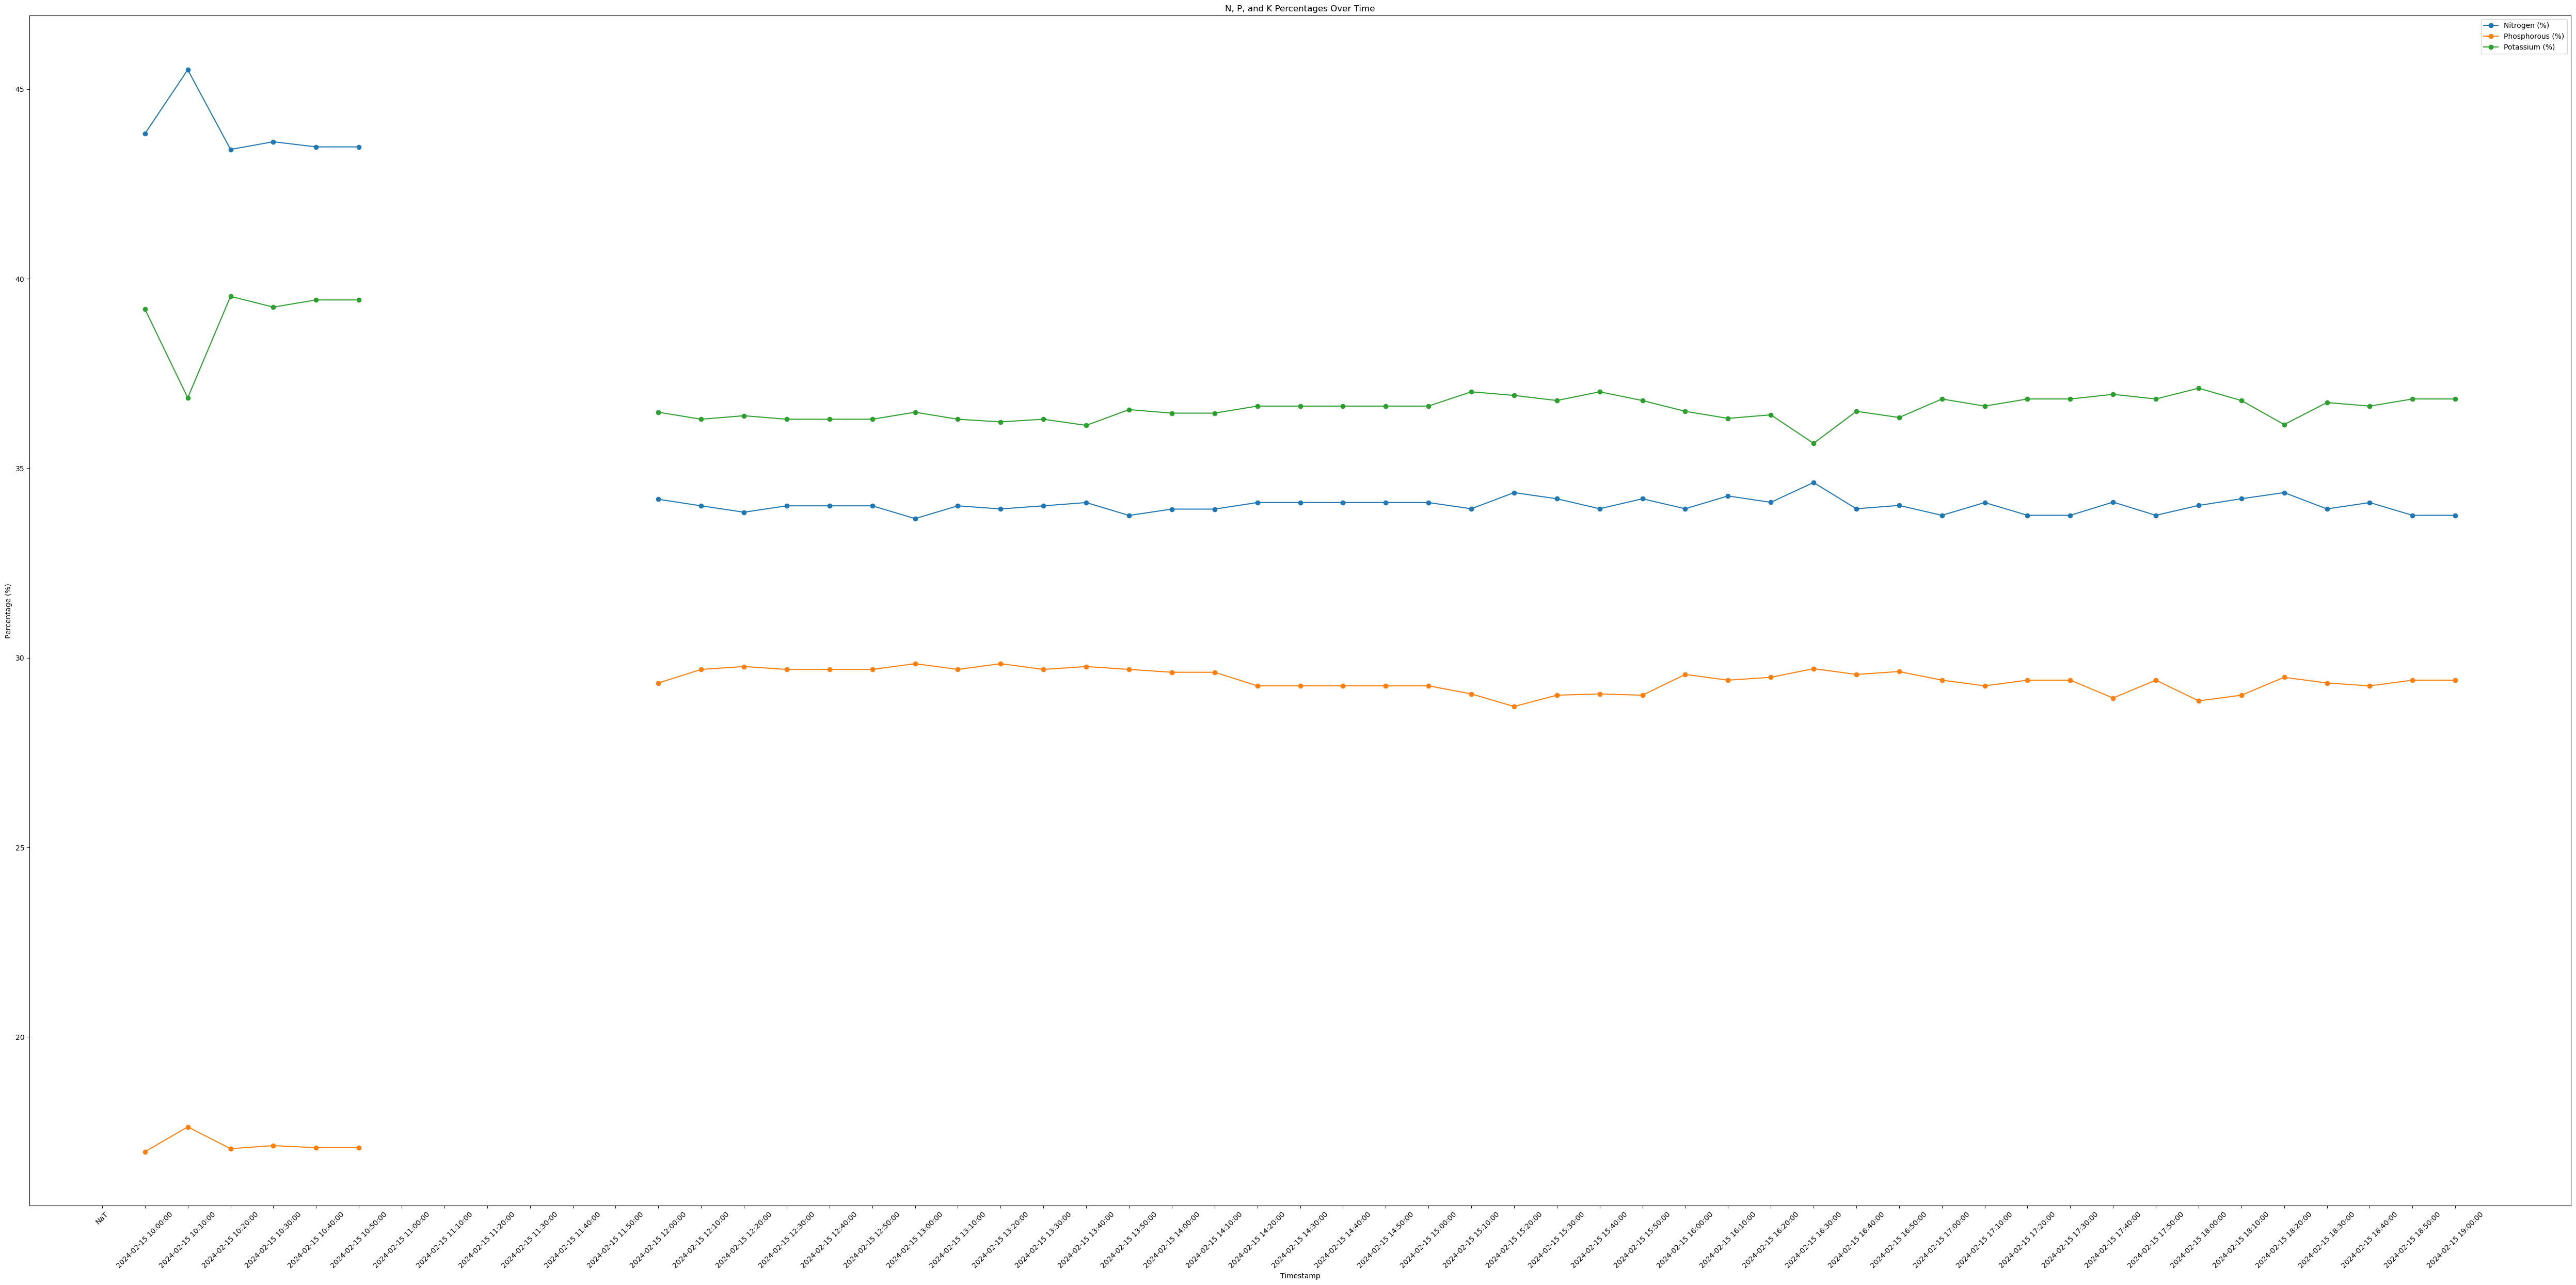

In [16]:

# plt.figure(figsize=(50, 25))

# # Plot each nutrient's percentage
# plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage'], label='Nitrogen (%)', marker='o')
# plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage'], label='Phosphorous (%)', marker='o')
# plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage'], label='Potassium (%)', marker='o')

# # Adding labels and title
# plt.title('N, P, and K Percentages Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Percentage (%)')

# # Rotate the x-axis labels to prevent overlap
# plt.xticks(rotation=45)

# # Adding a legend to distinguish between lines
# plt.legend()

# # Adjust the layout
# plt.tight_layout()

# # Display the plot
# plt.show()

rack1_1['Timestamp'] = rack1_1['Timestamp'].astype(str).fillna('placeholder')

plt.figure(figsize=(50, 25))

# Plot each nutrient's percentage
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage'], label='Nitrogen (%)', marker='o')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage'], label='Phosphorous (%)', marker='o')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage'], label='Potassium (%)', marker='o')

# Add labels and title
plt.title('N, P, and K Percentages Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percentage (%)')

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Add a legend to distinguish between lines
plt.legend()

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

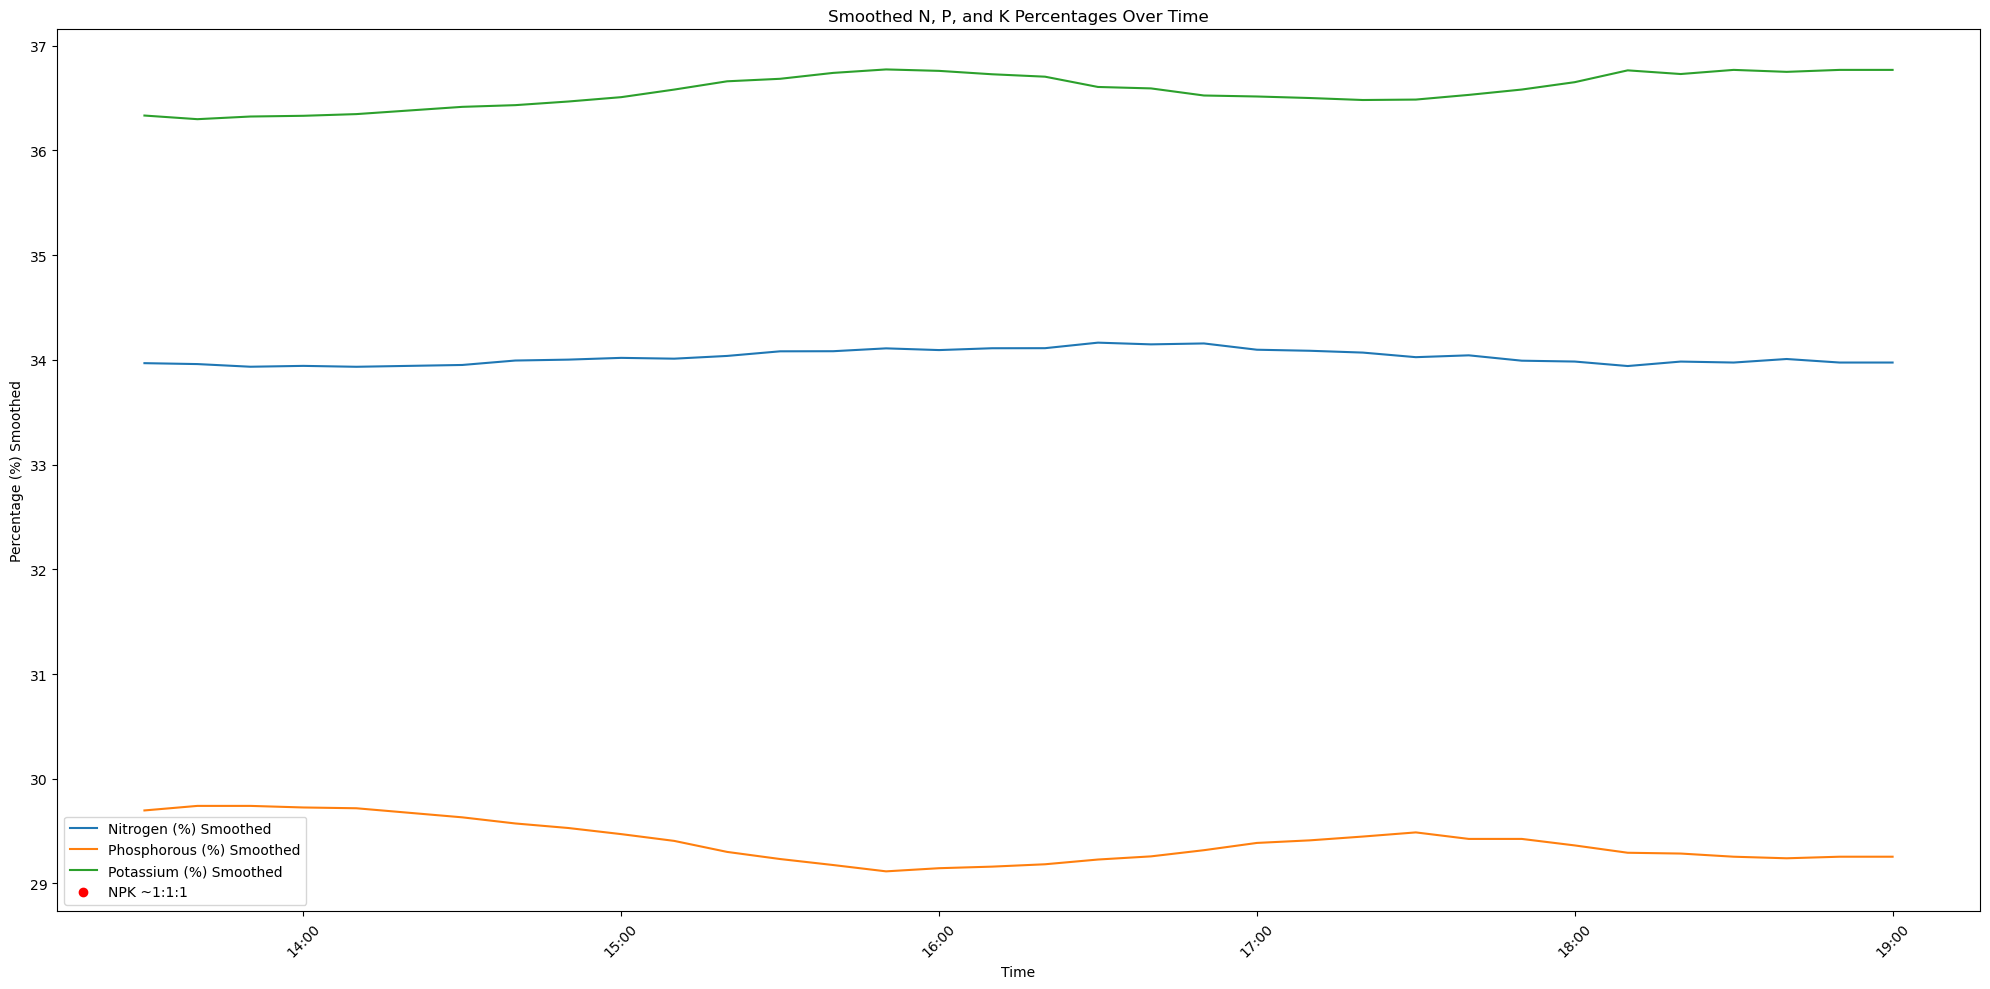

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Assuming rack1_1 is your DataFrame and you've already computed 'N_Percentage_Smooth', 'P_Percentage_Smooth', and 'K_Percentage_Smooth'

# Calculate the window for rolling averages
window_size = 10
rack1_1['N_Percentage_Smooth'] = rack1_1['N_Percentage'].rolling(window=window_size).mean()
rack1_1['P_Percentage_Smooth'] = rack1_1['P_Percentage'].rolling(window=window_size).mean()
rack1_1['K_Percentage_Smooth'] = rack1_1['K_Percentage'].rolling(window=window_size).mean()

# Calculate the difference from the 1:1:1 ratio
tolerance = 0.1  # 10% tolerance for equal ratio
rack1_1['NPK_Equal'] = (np.abs(rack1_1['N_Percentage_Smooth'] - rack1_1['P_Percentage_Smooth']) < tolerance * rack1_1['N_Percentage_Smooth']) & \
                       (np.abs(rack1_1['P_Percentage_Smooth'] - rack1_1['K_Percentage_Smooth']) < tolerance * rack1_1['P_Percentage_Smooth']) & \
                       (np.abs(rack1_1['K_Percentage_Smooth'] - rack1_1['N_Percentage_Smooth']) < tolerance * rack1_1['K_Percentage_Smooth'])

# Convert 'Timestamp' to datetime
rack1_1['Timestamp'] = pd.to_datetime(rack1_1['Timestamp'])

# Define the figure size
plt.figure(figsize=(20, 10))

# Plot the smoothed lines
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage_Smooth'], label='Nitrogen (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage_Smooth'], label='Phosphorous (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage_Smooth'], label='Potassium (%) Smoothed')

# Highlight points where the NPK ratio is close to 1:1:1
equal_npk = rack1_1[rack1_1['NPK_Equal']]
plt.scatter(equal_npk['Timestamp'], equal_npk['N_Percentage_Smooth'], color='red', label='NPK ~1:1:1', zorder=5)

# Set the title and labels
plt.title('Smoothed N, P, and K Percentages Over Time')
plt.xlabel('Time')
plt.ylabel('Percentage (%) Smoothed')

# Configure x-axis with time formatting
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes

plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.legend()
plt.show()


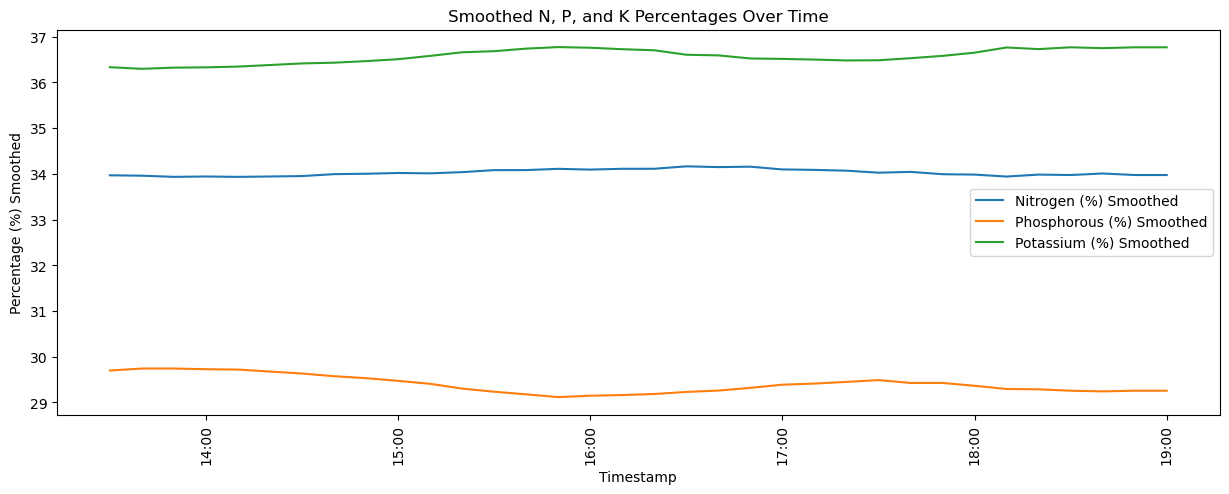

In [18]:
# Calculate rolling averages for a smoother plot
window_size = 10  # for example, a window of 10 data points
rack1_1['N_Percentage_Smooth'] = rack1_1['N_Percentage'].rolling(window=window_size).mean()
rack1_1['P_Percentage_Smooth'] = rack1_1['P_Percentage'].rolling(window=window_size).mean()
rack1_1['K_Percentage_Smooth'] = rack1_1['K_Percentage'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 5))
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage_Smooth'], label='Nitrogen (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage_Smooth'], label='Phosphorous (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage_Smooth'], label='Potassium (%) Smoothed')
plt.title('Smoothed N, P, and K Percentages Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percentage (%) Smoothed')

ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
plt.legend()
plt.xticks(rotation=90)  # May need to rotate the x-axis labels to vertical if still too cluttered
plt.show()


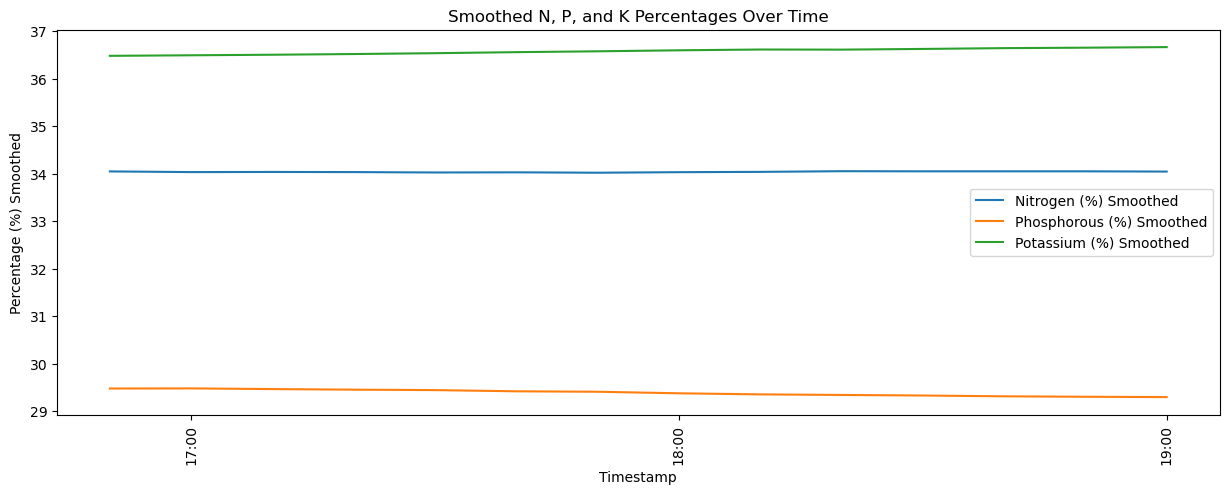

In [19]:
# Calculate rolling averages for a smoother plot
window_size = 30  # for example, a window of 10 data points
rack1_1['N_Percentage_Smooth'] = rack1_1['N_Percentage'].rolling(window=window_size).mean()
rack1_1['P_Percentage_Smooth'] = rack1_1['P_Percentage'].rolling(window=window_size).mean()
rack1_1['K_Percentage_Smooth'] = rack1_1['K_Percentage'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 5))
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage_Smooth'], label='Nitrogen (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage_Smooth'], label='Phosphorous (%) Smoothed')
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage_Smooth'], label='Potassium (%) Smoothed')
plt.title('Smoothed N, P, and K Percentages Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percentage (%) Smoothed')
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
plt.legend()
plt.xticks(rotation=90)  # May need to rotate the x-axis labels to vertical if still too cluttered
plt.show()


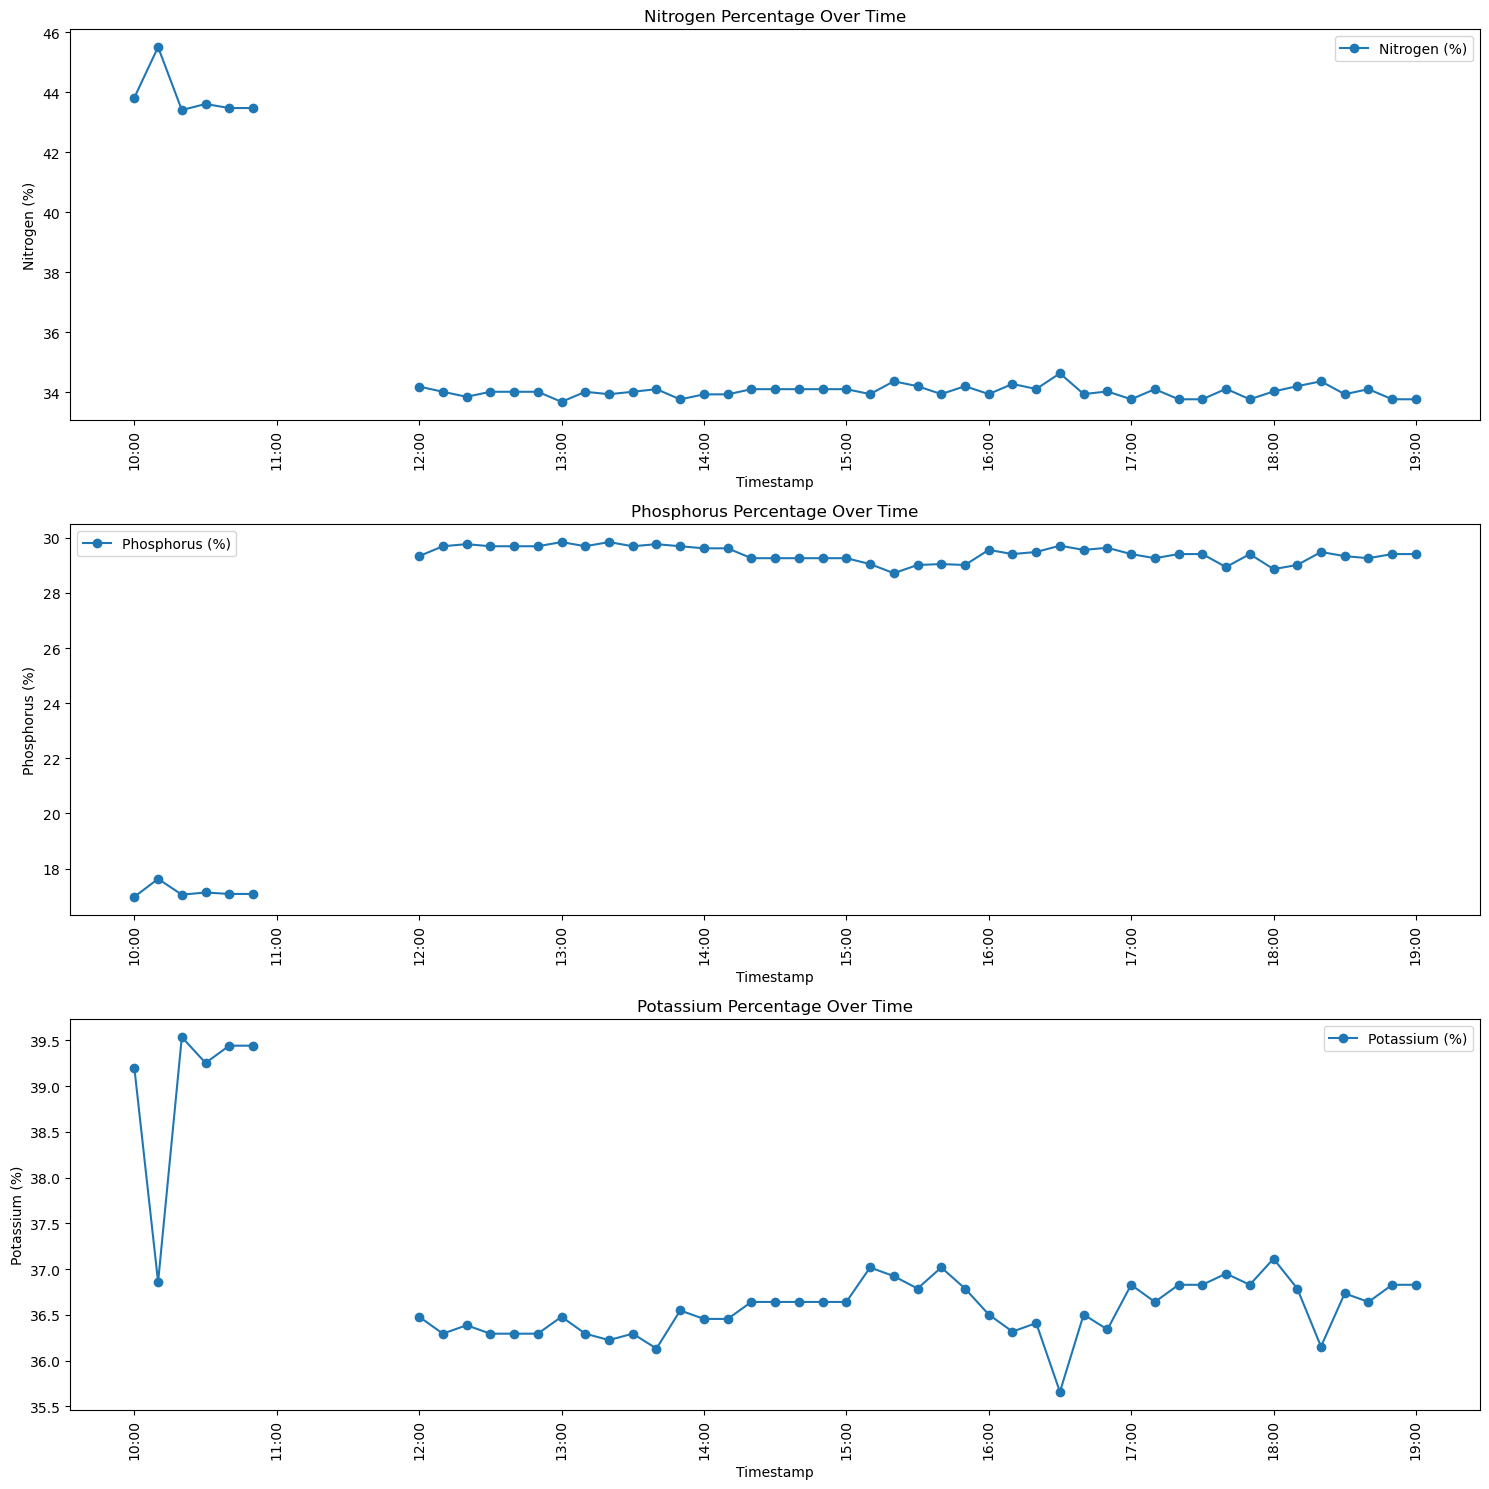

In [20]:
import matplotlib.pyplot as plt

# Define the size of the entire plotting area
plt.figure(figsize=(15, 15))

# Subplot for Nitrogen
plt.subplot(3, 1, 1)  # (number of rows, number of columns, subplot number)
plt.plot(rack1_1['Timestamp'], rack1_1['N_Percentage'], label='Nitrogen (%)', marker='o', linestyle='-')
plt.title('Nitrogen Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Nitrogen (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Subplot for Phosphorus
plt.subplot(3, 1, 2)
plt.plot(rack1_1['Timestamp'], rack1_1['P_Percentage'], label='Phosphorus (%)', marker='o', linestyle='-')
plt.title('Phosphorus Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Phosphorus (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes
# Subplot for Potassium
plt.subplot(3, 1, 3)
plt.plot(rack1_1['Timestamp'], rack1_1['K_Percentage'], label='Potassium (%)', marker='o', linestyle='-')
plt.title('Potassium Percentage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Potassium (%)')
plt.xticks(rotation=90)
plt.legend()
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Locate hours every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes

# Adjust the layout so that all subplots fit into the figure area
plt.tight_layout()

# Show the plots
plt.show()
